In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_parquet('proc_data')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, C10001 to C19190
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CRED

In [3]:
tsne_columns = [f"tsne{i+1}" for i in range(3)]
pca_columns = [f"pca{i+1}" for i in range(3)]
pca_tsne_cols = tsne_columns + pca_columns

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import silhouette_score
from tqdm import tqdm

In [5]:
features = data.drop(pca_tsne_cols, axis=1)
features

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10005    817.714335           1.000000      16.00             16.00   
C10006   1809.828751           1.000000    1333.28              0.00   
...              ...                ...        ...               ...   
C19184      5.871712           0.500000      20.90             20.90   
C19186     28.493517           1.000000     291.12              0.00   
C19188     23.398673           0.833333     144.40              0.00   
C19189     13.457564           0.833333       0.00              0.00   
C19190    372.708075           0.666667    1093.25           1093.25   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667   
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10005                     0.00      0.000000             0.083333   
C10006                  1333.28      0.000000             0.666667   
...                         ...           ...                  ...   
C19184                     0.00      0.000000             0.166667   
C19186                   291.12      0.000000             1.000000   
C19188                   144.40      0.000000             0.833333   
C19189                     0.00     36.558778             0.000000   
C19190                     0.00    127.040008             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10005                     0.083333                          0.000000   
C10006                     0.000000                          0.583333   
...                             ...                               ...   
C19184                     0.166667                          0.000000   
C19186                     0.000000                          0.833333   
C19188                     0.000000                          0.666667   
C19189                     0.000000                          0.000000   
C19190                     0.666667                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10005                 0.000000                 0              1   
C10006                 0.000000                 0              8   
...                         ...               ...            ...   
C19184                 0.000000                 0              1   
C19186                 0.000000                 0              6   
C19188                 0.000000                 0              5   
C19189                 0.166667                 2              0   
C19190                 0.333333                 2             23   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003

In [6]:
scaler = StandardScaler()
scaled = StandardScaler().fit_transform(features)

In [7]:
normalizer = Normalizer(norm='l2')
X = normalizer.fit_transform(scaled)
X = pd.DataFrame(data=X, columns=features.columns)
X

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.311806          -0.154954  -0.179717         -0.150396   
1     0.215652           0.019100  -0.133545         -0.101359   
2     0.121694           0.144174  -0.033208          0.028501   
3    -0.156537           0.211587  -0.195017         -0.146385   
4     0.045686           0.231939   0.065195         -0.164825   
...        ...                ...        ...               ...   
8631 -0.145686          -0.363972  -0.088705         -0.066352   
8632 -0.147255           0.099159  -0.066484         -0.070466   
8633 -0.156509          -0.061752  -0.084507         -0.074653   
8634 -0.153722          -0.060273  -0.096002         -0.072865   
8635 -0.115235          -0.216128   0.006151          0.056992   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.148581     -0.196246            -0.343691   
1                  -0.129489      0.724875            -0.348852   
2                  -0.130890     -0.133690             0.358313   
3                  -0.192092     -0.196202            -0.430561   
4                   0.456538     -0.215074             0.195195   
...                      ...           ...                  ...   
8631               -0.087801     -0.089679            -0.157057   
8632               -0.027749     -0.091949             0.246439   
8633               -0.062647     -0.097412             0.174744   
8634               -0.093087     -0.091582            -0.250781   
8635               -0.090187     -0.080345             0.083602   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.287374                         -0.300313   
1                      -0.193676                         -0.261474   
2                       0.754993                         -0.264303   
3                      -0.171033                         -0.387886   
4                      -0.314946                          0.247302   
...                          ...                               ...   
8631                   -0.025027                         -0.177294   
8632                   -0.134646                          0.228945   
8633                   -0.142646                          0.155522   
8634                   -0.139229                         -0.187968   
8635                    0.301843                         -0.182111   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.285562         -0.200761      -0.216751     -0.403071   
1                   0.157198          0.028012      -0.168495      0.191114   
2                  -0.194536         -0.136766      -0.034365      0.232162   
3                  -0.285498         -0.200715      -0.233329     -0.380097   
4                  -0.312960         -0.220022      -0.128189     -0.341406   
...                      ...               ...            ...           ...   
8631               -0.130494         -0.091742      -0.106649     -0.210341   
8632               -0.133797         -0.094064      -0.070388     -0.188855   
8633               -0.141746         -0.099653      -0.082825     -0.200075   
8634                0.029221         -0.038564      -0.121127     -0.223005   
8635                0.190660         -0.037363       0.062191     -0.178454   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.227772         -0.127929         -0.225169  0.148729  
1     0.224880          0.024747          0.059936  0.100236  
2    -0.113964         -0.028500         -0.153394  0.101320  
3    -0.159155         -0.109322         -0.225118  0.148696  
4    -0.060632          0.298463         -0.246772  0.162999  
...        ...               ...               ...       ...  
8631 -0.113500         -0.066206         -0.102896 -0.807858  
8632 -0.098373         -0.067434          0.225630 -0.828306  
8633 -0.121671         -0.068503          0.063633 -

# NO PCA

In [8]:
no_pca_X = X.copy()

In [9]:
%%time
def calc_silhouette(X):
    silhouette_avg = list()
    for cluster_num in tqdm(range(2, 10)):
        kmeans = KMeans(
            n_clusters=cluster_num,
            init='k-means++',
            random_state=42,
        )
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_avg.append(silhouette_score(X, labels))
    return silhouette_avg
silhouette_avg = calc_silhouette(no_pca_X)

100%|███████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.42it/s]

CPU times: user 16.7 s, sys: 15 s, total: 31.7 s
Wall time: 5.63 s


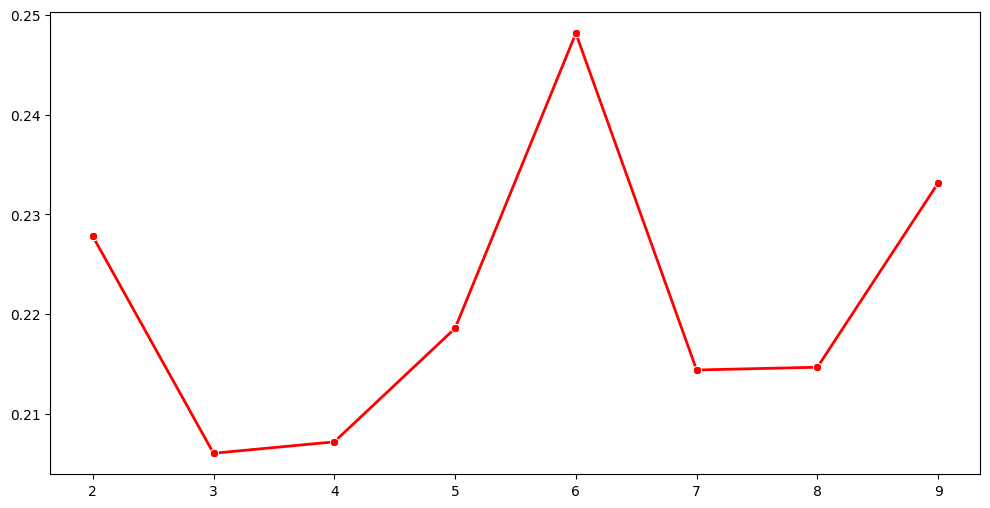

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(x=range(2,10),y=silhouette_avg,linewidth=2,color='red',marker='8')
plt.show()

In [11]:
kmeans = KMeans(
    n_clusters=6,
    init='k-means++',
    random_state=42,
)
labels = kmeans.fit_predict(no_pca_X)
no_pca_X['cluster'] = labels

In [12]:
no_pca_X.cluster.value_counts()

cluster
1    1860
2    1722
3    1720
0    1527
5    1159
4     648
Name: count, dtype: int64

In [13]:
%%time
pca_result = pd.DataFrame(PCA(n_components=3).fit_transform(no_pca_X.drop('cluster', axis=1)))
pca_result.columns = ['pca1', 'pca2', 'pca3']
pca_result['cluster'] = no_pca_X['cluster']
px.scatter_3d(
    pca_result,
    x='pca1',
    y='pca2',
    z='pca3',
    color='cluster',
    # opacity=0.7,
)

CPU times: user 1.25 s, sys: 1.12 s, total: 2.37 s
Wall time: 329 ms


# PCA

In [14]:
pca_X = X.copy()
only_pca = PCA(n_components=3, random_state=42)
pca_X = pd.DataFrame(only_pca.fit_transform(pca_X))
pca_X.columns = ['pca1', 'pca2', 'pca3']
pca_X

pca1      pca2      pca3
0    -0.481788 -0.692991  0.040187
1    -0.537375  0.527807 -0.209187
2     0.320760  0.265225 -0.086076
3    -0.562994 -0.503868  0.235237
4     0.320512 -0.254469  0.550185
...        ...       ...       ...
8631 -0.214324 -0.267826 -0.399506
8632  0.320251 -0.195203 -0.060136
8633  0.183536 -0.245043 -0.125278
8634 -0.307306 -0.176105 -0.255936
8635  0.008883  0.091171 -0.358365

[8636 rows x 3 columns]

In [15]:
pca_silhouette_avg = calc_silhouette(pca_X)

100%|███████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.50it/s]


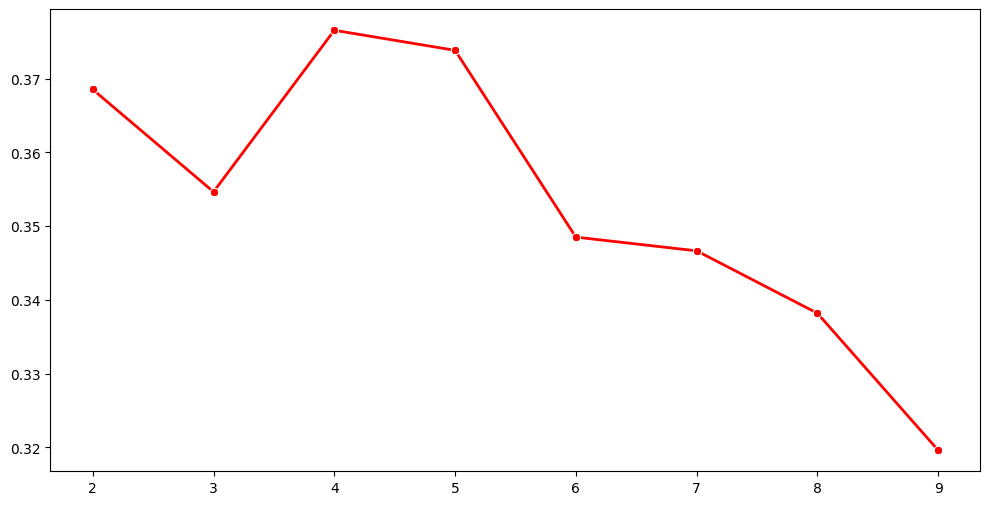

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(x=range(2,10),y=pca_silhouette_avg,linewidth=2,color='red',marker='8')
plt.show()

In [17]:
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    random_state=42,
)
labels = kmeans.fit_predict(pca_X)
pca_X['cluster'] = labels

In [18]:
pca_X.cluster.value_counts()

cluster
1    3256
2    2138
0    1735
3    1507
Name: count, dtype: int64

In [19]:
pca_X

pca1      pca2      pca3  cluster
0    -0.481788 -0.692991  0.040187        2
1    -0.537375  0.527807 -0.209187        0
2     0.320760  0.265225 -0.086076        1
3    -0.562994 -0.503868  0.235237        2
4     0.320512 -0.254469  0.550185        1
...        ...       ...       ...      ...
8631 -0.214324 -0.267826 -0.399506        3
8632  0.320251 -0.195203 -0.060136        1
8633  0.183536 -0.245043 -0.125278        3
8634 -0.307306 -0.176105 -0.255936        3
8635  0.008883  0.091171 -0.358365        3

[8636 rows x 4 columns]

CPU times: user 130 ms, sys: 46.8 ms, total: 177 ms
Wall time: 25.7 ms


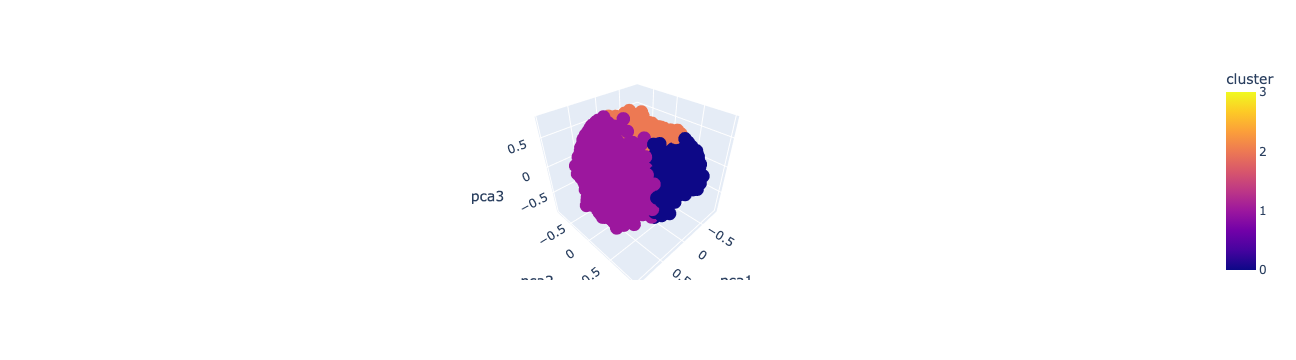

In [20]:
%%time
px.scatter_3d(
    pca_X.sample(frac=.25),
    x='pca1',
    y='pca2',
    z='pca3',
    color='cluster',
    # opacity=0.7,
)

# Centroids

In [21]:
centroids_pca = kmeans.cluster_centers_

In [22]:
centroids_normalized = only_pca.inverse_transform(centroids_pca)

In [23]:
centroids_scaled = normalizer.inverse_transform(centroids_normalized)

AttributeError: 'Normalizer' object has no attribute 'inverse_transform'

# Try with MinMaxScaler

In [79]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
# normalizer = Normalizer(norm='l2')
normalizer = MinMaxScaler()
X = normalizer.fit_transform(scaled)
X = pd.DataFrame(data=X, columns=features.columns)
X

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.002148           0.818182   0.001945          0.000000   
1     0.168169           0.909091   0.000000          0.000000   
2     0.131026           1.000000   0.015766          0.018968   
3     0.042940           1.000000   0.000326          0.000393   
4     0.095038           1.000000   0.027188          0.000000   
...        ...                ...        ...               ...   
8631  0.000308           0.500000   0.000426          0.000513   
8632  0.001496           1.000000   0.005936          0.000000   
8633  0.001229           0.833333   0.002945          0.000000   
8634  0.000707           0.833333   0.000000          0.000000   
8635  0.019572           0.666667   0.022293          0.026821   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.004240      0.000000             0.166667   
1                   0.000000      0.136685             0.000000   
2                   0.000000      0.000000             1.000000   
3                   0.000000      0.000000             0.083333   
4                   0.059257      0.000000             0.666667   
...                      ...           ...                  ...   
8631                0.000000      0.000000             0.166667   
8632                0.012939      0.000000             1.000000   
8633                0.006418      0.000000             0.833333   
8634                0.000000      0.000776             0.000000   
8635                0.000000      0.002695             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000           0.00000       0.005587      0.031720   
1                   0.166667           0.03252       0.000000      0.232053   
2                   0.000000           0.00000       0.033520      0.248748   
3                   0.000000           0.00000       0.002793      0.038397   
4                   0.000000           0.00000       0.022346      0.058431   
...                      ...               ...            ...           ...   
8631                0.000000           0.00000       0.002793      0.015025   
8632                0.000000           0.00000       0.016760      0.031720   
8633                0.000000           0.00000       0.013966      0.031720   
8634                0.111111           0.01626       0.000000      0.015025   
8635                0.222222           0.01626       0.064246      0.038397   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.003978          0.001826          0.000000     1.0  
1     0.080892          0.014034          0.222222     1.0  
2     0.012263          0.008210          0.000000     1.0  
3     0.013373          0.003204          0.000000     1.0  
4     0.027602          0.031506          0.000000     1.0  
...        ...               ...               ...     ...  
8631  0.001155          0.000569          0.000000     0.0  
8632  0.006418          0.000640          0.500000     0.0  
8633  0.001601          0.001078          0.250000     0.0  
8634  0.0

In [82]:
pca_X = X.copy()
only_pca = PCA(n_components=3, random_state=42)
pca_X = pd.DataFrame(only_pca.fit_transform(pca_X))
pca_X.columns = ['pca1', 'pca2', 'pca3']
pca_X

pca1      pca2      pca3
0    -0.492046 -0.106987 -0.024615
1    -0.620691 -0.030137  0.111544
2     0.291581  0.922922 -0.133906
3    -0.567819  0.023027 -0.070132
4     0.188140 -0.249456 -0.228906
...        ...       ...       ...
8631 -0.563051 -0.056264  0.207772
8632  0.641651 -0.439862  0.267982
8633  0.357222 -0.397023  0.144246
8634 -0.650113 -0.170495  0.310374
8635 -0.096259  0.454804  0.094945

[8636 rows x 3 columns]

In [83]:
pca_silhouette_avg = calc_silhouette(pca_X)

100%|███████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.37it/s]


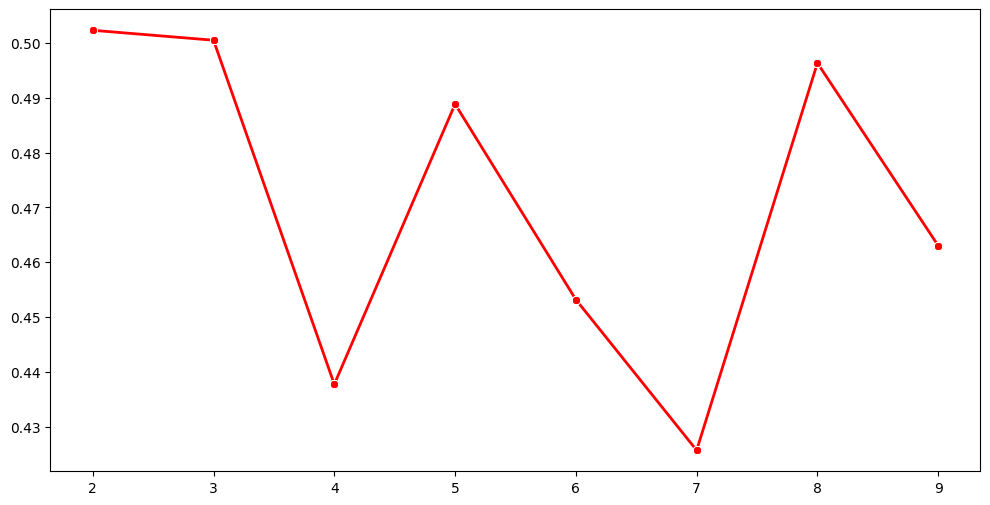

In [84]:
plt.figure(figsize=(12,6))
sns.lineplot(x=range(2,10),y=pca_silhouette_avg,linewidth=2,color='red',marker='8')
plt.show()

In [85]:
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    random_state=42,
)
labels = kmeans.fit_predict(pca_X)
pca_X['cluster'] = labels

In [86]:
pca_X.cluster.value_counts()

cluster
0    4527
1    2726
2    1383
Name: count, dtype: int64

In [87]:
%%time
px.scatter_3d(
    pca_X.sample(frac=.25),
    x='pca1',
    y='pca2',
    z='pca3',
    color='cluster',
    # opacity=0.7,
)

CPU times: user 122 ms, sys: 36.3 ms, total: 158 ms
Wall time: 22.2 ms


In [88]:
centroids_pca = kmeans.cluster_centers_

In [89]:
centroids_normalized = only_pca.inverse_transform(centroids_pca)

In [90]:
centroids_scaled = normalizer.inverse_transform(centroids_normalized)

In [91]:
centroids_original = scaler.inverse_transform(centroids_scaled)

In [95]:
pd.DataFrame(data=centroids_original, columns=X.columns)

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  1740.920984           0.850677   212.458278        189.513814   
1  1181.584483           0.916929  1270.109698        390.354228   
2  1969.958662           0.996963  3201.494224       2384.602791   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               23.136253   1391.518199             0.156654   
1              880.401163    494.011770             0.848792   
2              816.934414    679.139976             0.911315   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.082647                          0.053593   
1                    0.114055                          0.837800   
2                    0.789459                          0.476787   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.193518          4.570615       1.518540   4060.645151   
1                0.069131          1.699678      23.997300   4024.820150   
2                0.089518          2.381156      41.576841   7008.395267   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0  1440.254493        849.278767          0.069639  11.434293  
1  1569.951125        928.914059          0.240528  11.528805  
2  3331.533508        786.347012          0.292630  11.872558

In [97]:
data.agg(['mean'])

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
mean  1601.224893           0.895035  1025.433874        604.901438   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
mean              420.843533    994.175523                0.496   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
mean                    0.205909                           0.36882   

      CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
mean                0.137604  ...  1784.478099        864.304943   

      PRC_FULL_PAYMENT     TENURE          pca1          pca2          pca3  \
mean          0.159304  11.534391  4.313676e-13 -1.348024e-13 -3.370059e-13   

         tsne1     tsne2     tsne3  
mean  0.179917  0.049011 -0.103171  

[1 rows x 23 columns]